# 📓 Muon Detection through Three Layers of Plastic Scintillator
**Author:** Arpad Schaeffer 



# Détection de muons à travers trois couches de scintillateur plastique

Dans ce notebook, nous présentons une étude expérimentale visant à détecter des muons cosmiques à l'aide de trois couches de scintillateur plastique, couplées à des photomultiplicateurs (PM) et reliées à un système d'acquisition. 

L'objectif est double :
1. Visualiser les signaux issus de l'oscilloscope pour identifier les événements caractéristiques des muons.
2. Caractériser les performances du système de détection (résolution temporelle, taux de comptage, coïncidences, efficacité de détection).

Ce document servira de base à l’analyse des données expérimentales et à l’interprétation physique des résultats.


In [2]:

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit
from scipy.stats import chisquare


## 📊 Partie 1 – Visualisation des signaux issus de l’oscilloscope

Dans cette section, nous allons importer des données issues d’un oscilloscope (formes d’ondes), les afficher, et analyser les caractéristiques des signaux : largeur d’impulsion, amplitude, forme typique des événements, etc.

In [3]:
# Exemple : chargement de données CSV exportées depuis un oscilloscope
data = pd.read_csv("oscilloscope_data.csv")
time = data['Time (ns)']
signal_ch1 = data['CH1']
signal_ch2 = data['CH2']

# Aperçu des premières lignes
data.head()

FileNotFoundError: [Errno 2] No such file or directory: 'oscilloscope_data.csv'

In [ ]:
plt.figure(figsize=(10,5))
plt.plot(time, signal_ch1, label='Canal 1 (scintillateur 1)')
plt.plot(time, signal_ch2, label='Canal 2 (scintillateur 2)', alpha=0.7)
plt.xlabel("Temps (ns)")
plt.ylabel("Amplitude (V)")
plt.title("Signaux typiques détectés sur l’oscilloscope")
plt.legend()
plt.grid(True)
plt.figtext(0.5, -0.1, "Figure: Signaux typiques détectés sur l’oscilloscope", wrap=True, horizontalalignment='center', fontsize=10)  # Légende de la figure
plt.show()

## 📈 Partie 2 – Caractérisation du système de détection

Nous allons ici explorer plusieurs éléments :
- Le taux de comptage individuel des scintillateurs.
- Le taux de coïncidences doubles et triples.
- L'efficacité relative des détecteurs.
- L'estimation de la résolution temporelle.

### II.1 Étude de la réponse en tension

Dans cette sous-section, nous analysons comment le nombre de détections (counts) varie en fonction de la tension appliquée aux scintillateurs. Cela permet de caractériser la sensibilité du système de détection en fonction de la tension.

In [ ]:
# Exemple : fichier CSV avec taux de comptage mesurés pour différents temps d’acquisition
count_data = pd.read_csv("comptage_muons.csv")
count_data.head()

In [ ]:
plt.figure(figsize=(8,5))
plt.plot(count_data['Temps (s)'], count_data['Détecteur 1'], label='Scintillateur 1')
plt.plot(count_data['Temps (s)'], count_data['Détecteur 2'], label='Scintillateur 2')
plt.plot(count_data['Temps (s)'], count_data['Coïncidence 1&2'], label='Coïncidence 1&2')
plt.plot(count_data['Temps (s)'], count_data['Triple coïncidence'], label='Triple coïncidence')
plt.xlabel("Temps d’acquisition (s)")
plt.ylabel("Nombre d’impulsions")
plt.title("Taux de comptage des détecteurs")
plt.legend()
plt.grid()
plt.show()

NameError: name 'count_data' is not defined

<Figure size 800x500 with 0 Axes>

### II.2 Etude du treshold

Dans cette sous-section, nous cherchons un couple de valeurs efficaces entre tension et threshold pour maximiser la détection de muons mais aussi pour minimiser le bruit.

Chi carré réduit: 36.72


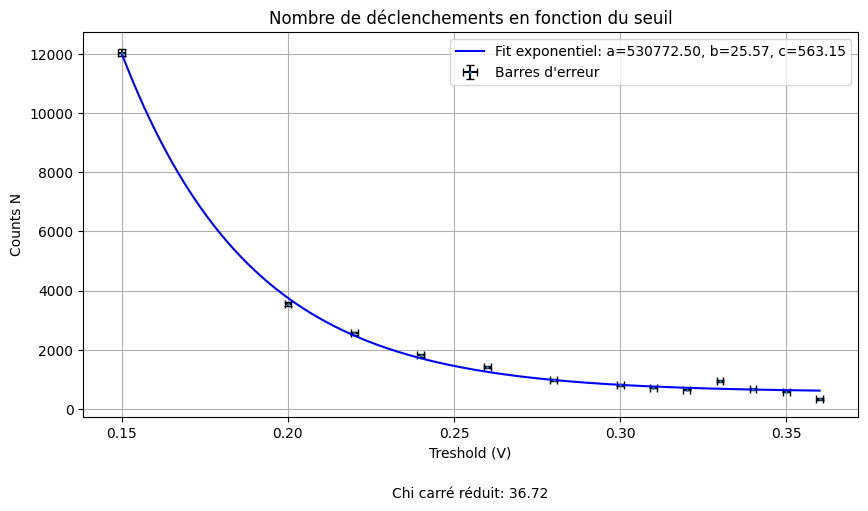

In [ ]:
# Chargement des données depuis le fichier CSV
data_dect1 = pd.read_csv("1900_DECT1.csv")

# Supposons que le fichier contient des colonnes 'Temps (s)' et 'Amplitude (V)'
x = data_dect1['Tresh (V)']
y = data_dect1['N']
# Définir les erreurs sur y et x
y_errors = np.sqrt(y)
x_errors = np.full_like(x, 0.001)

# Définir une fonction exponentielle pour le fit
def exp_func(x, a, b, c):
    return a * np.exp(-b * x) + c

# Ajustement des données avec curve_fit
# Provide initial guesses for the parameters (a, b, c)
initial_guesses = [12000, 10, 300]

# Increase maxfev to allow more iterations
params, covariance = curve_fit(exp_func, x, y, p0=initial_guesses, maxfev=5000)

# Extraire les paramètres ajustés
a, b, c = params

# Générer des points pour tracer la courbe ajustée
x_fit = np.linspace(min(x), max(x), 500)
y_fit = exp_func(x_fit, a, b, c)
# Calcul du chi carré réduit
chi_squared = np.sum(((y - exp_func(x, a, b, c)) / y_errors) ** 2)
degrees_of_freedom = len(y) - len(params)  # Nombre de points - nombre de paramètres ajustés
reduced_chi_squared = chi_squared / degrees_of_freedom

print(f"Chi carré réduit: {reduced_chi_squared:.2f}")
# Ajouter la courbe ajustée au tracé

# Tracé des données
plt.figure(figsize=(10, 5))
plt.errorbar(x, y, yerr=y_errors, xerr=x_errors, fmt='o', ecolor='black', capsize=3, label='Barres d\'erreur', markersize=1)
plt.plot(x_fit, y_fit, color='blue', label=f'Fit exponentiel: a={a:.2f}, b={b:.2f}, c={c:.2f}')
plt.xlabel("Treshold (V)")
plt.ylabel("Counts N")
plt.title("Nombre de déclenchements en fonction du seuil")
plt.legend()
plt.text(0.5, -0.2, f"Chi carré réduit: {reduced_chi_squared:.2f}", horizontalalignment='center', verticalalignment='center', transform=plt.gca().transAxes)
plt.grid(True)
plt.show()

## 📎 (Facultatif) Partie 3 – Analyse temporelle

Cette section peut inclure :
- Histogrammes des temps entre signaux (time-over-threshold, délai inter-détecteurs).
- Distribution gaussienne des écarts temporels → résolution temporelle.